In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalized = x_train_image.astype('float32') / 255.0
x_test_normalized = x_test_image.astype('float32') / 255.0
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)
y_train = y_train_label.flatten()  # 从(50000,1)变为(50000,)
y_test = y_test_label.flatten()
#根据不同的损失函数选择不同的标签格式


In [ ]:
#通过LeNet实现CIFAR-10分类任务
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=3, strides=(1,1),input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

C:\Users\吴逸彬\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 6)      │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 15, 15, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,302 (317.59 KB)

 Trainable params: 81,302 (317.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_train = model.fit(x_train_normalized, y_train,  # 使用y_train而不是y_train_OneHot
                       validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3057 - loss: 1.9257 - val_accuracy: 0.3767 - val_loss: 1.7236
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4306 - loss: 1.5841 - val_accuracy: 0.4556 - val_loss: 1.5131
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4831 - loss: 1.4375 - val_accuracy: 0.4822 - val_loss: 1.4352
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5125 - loss: 1.3651 - val_accuracy: 0.5068 - val_loss: 1.3914
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5346 - loss: 1.3038 - val_accuracy: 0.5299 - val_loss: 1.3229
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5523 - loss: 1.2615 - val_accuracy: 0.5332 - val_loss: 1.3126
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5659 - loss: 1.2262 - val_accuracy: 0.5574 - val_loss: 1.2601
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5755 - loss: 1.1973 - val_accuracy: 0

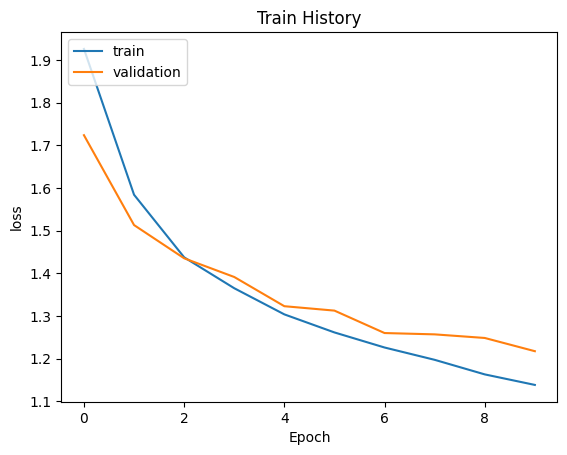

313/313 - 1s - 2ms/step - accuracy: 0.5706 - loss: 1.2029


In [14]:
train_history(model_train,'loss','val_loss')
scores = model.evaluate(x_test_normalized, y_test, verbose=2)


In [16]:
##通过AlexNet实现CIFAR-10分类任务
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(32,32,3),padding='same'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model2.add(keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model2.add(keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(units=4096, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(units=4096, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(units=10, activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_train = model2.fit(x_train_normalized, y_train_OneHot,  
                       validation_split=0.2, epochs=10, batch_size=300, verbose=1)

C:\Users\吴逸彬\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,623,562 (82.49 MB)

 Trainable params: 21,622,858 (82.48 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 58s 416ms/step - accuracy: 0.3145 - loss: 1.8115 - val_accuracy: 0.1473 - val_loss: 2.9402
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 403ms/step - accuracy: 0.4670 - loss: 1.4586 - val_accuracy: 0.3543 - val_loss: 1.8572
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 406ms/step - accuracy: 0.5307 - loss: 1.3022 - val_accuracy: 0.4439 - val_loss: 1.5760
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 55s 408ms/step - accuracy: 0.5753 - loss: 1.1927 - val_accuracy: 0.4296 - val_loss: 1.7387
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.6107 - loss: 1.1021 - val_accuracy: 0.5087 - val_loss: 1.4849
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 404ms/step - accuracy: 0.6453 - loss: 1.0145 - val_accuracy: 0.5884 - val_loss: 1.1789
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.6704 - loss: 0.9355 - val_accuracy: 0.5720 - val_loss: 1.3106
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 403ms/step - accuracy: 0.7020 - loss: 0

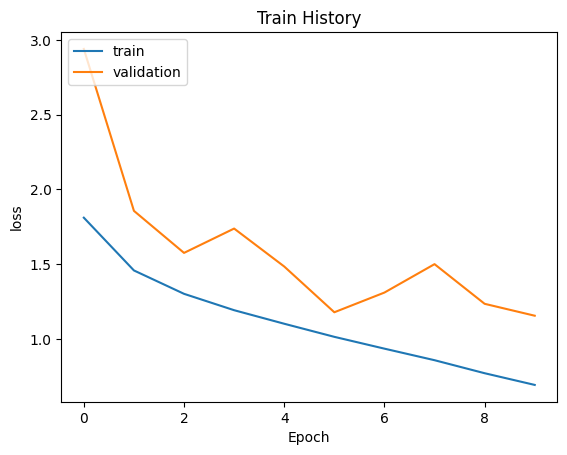

313/313 - 4s - 11ms/step - accuracy: 0.6085 - loss: 1.1888


In [17]:
train_history(model_train,'loss','val_loss')
scores = model2.evaluate(x_test_normalized, y_test_OneHot, verbose=2)